In [ ]:
## set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans




%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')



data = pd.read_csv('/content/drive/MyDrive/Bootcamp/machine_learning/challenge_2/card_transactions.csv')
data.head(30)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


customer_id  balance_account  purchases_amount  paid_advance  \
0   tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1   stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2   CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3   0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4   6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   
5   3Zx75mmL4wXFf36M      9266.080540            100.00   4383.296268   
6   VIncqsQDzbMSsvL9        97.389327             60.00      0.000000   
7   fDoLh1FTtFMuu3xs      4788.283283              0.00    437.808586   
8   OpclyuJ9WGTLImw1       319.037744           1262.28      0.000000   
9   k2GbzBNCo0TQmwaw      1641.251218              0.00   2990.165538   
10  tKxL5rE73TQL43Vb       179.357206            497.15      0.000000   
11  w5Ld64atScO1TKqb       639.730380            951.05      0.000000   
12  JC9XINBsvY4kxyhv      7499.658084            160.00   3603.787202   
13  FhpkNrprbXsmN5BT       303.054817            894.40      0.000000   
14  uDs0DVNfG7EDdaTE      3516.835582           4019.73      0.000000   
15  WtRLwDebGjO2TZES       179.882212            828.00      0.000000   
16  ehzMf38keulF4fSJ      2739.711796            847.66   1201.188255   
17  H8Hm7TvThVB3dbSi      1361.815512           1309.72    814.086208   
18  ZgZDmu1CQM3jqFB5      1630.620638              0.00    381.541722   
19  WHWy3OQxpYdblb4z      1200.937942              0.00   1981.157622   
20  DHLICFofF4NbkTI1       251.273637           1861.74      0.000000   
21  pu5OvXyrkvF8WEX4      4202.169500            462.00   4776.104770   
22  5cNICvDuU70oSxHV       486.661842           1898.88      0.000000   
23  FACjJK6oE84bwwvl      1647.932117              0.00     93.690441   
24  Hik1ahI9PjnV7wHy       463.071440           1817.84      0.000000   
25  ARqrqXYtVOsCKAqA       293.118363            368.91    683.536421   
26  Tpugf58tjiahDh1d      1191.662907            979.92      0.000000   
27  xErcXVe5RtT8Z558        28.329892            292.59      0.000000   
28  4Z2mnzQfPiRKpUun       140.120632            644.16      0.000000   
29  C9WDDshw5YIAvH0c         0.000000            240.10      0.000000   

    full_purchases  balance_frequency_update  installments  \
0             0.00                  0.909091        107.60   
1             0.00                  1.000000        150.30   
2             0.00                  1.000000          0.00   
3           363.18                  1.000000          0.00   
4            95.00                  0.363636          0.00   
5             0.00                  1.000000        100.00   
6            60.00                  1.000000          0.00   
7             0.00                  1.000000          0.00   
8          1262.28                  0.818182          0.00   
9             0.00                  0.727273          0.00   
10          497.15                  1.000000          0.00   
11          785.05                  1.000000        166.00   
12          160.00                  1.000000          0.00   
13          609.40                  0.636364        285.00   
14         1932.75                  1.000000       2086.98   
15            0.00                  1.000000        828.00   
16          765.80                  1.000000         81.86   
17         1106.81                  1.000000        202.91   
18            0.00                  1.000000          0.00   
19            0.00                  0.833333          0.00   
20         1861.74                  0.272727          0.00   
21          462.00                  1.000000          0.00   
22          939.09                  0.833333        959.79   
23            0.00                  1.000000          0.00   
24         1817.84                  1.000000          0.00   
25            0.00                  1.000000        368.91   
26          849.92                  1.000000        130.00   
27       

In [ ]:
data.describe()

balance_account  purchases_amount  paid_advance  full_purchases  \
count      8500.000000       8500.000000   8500.000000     8500.000000   
mean       1565.941403        999.561312    973.508540      588.165365   
std        2090.513302       2154.189460   2078.539061     1669.466184   
min           0.000000          0.000000      0.000000        0.000000   
25%         126.318369         39.000000      0.000000        0.000000   
50%         869.046468        360.000000      0.000000       37.400000   
75%        2053.674410       1105.897500   1113.726110      570.410000   
max       19043.138560      49039.570000  47137.211760    40761.250000   

       balance_frequency_update  installments  purchases_frequency  \
count               8500.000000   8500.000000          8500.000000   
mean                   0.876272    411.708492             0.489383   
std                    0.237517    910.142440             0.401075   
min                    0.000000      0.000000             0.000000   
25%                    0.875000      0.000000             0.083333   
50%                    1.000000     89.000000             0.500000   
75%                    1.000000    466.725000             0.916667   
max                    1.000000  22500.000000             1.000000   

       full_purchases_frequency  purchases_installments_frequency  \
count               8500.000000                       8500.000000   
mean                   0.201940                          0.363796   
std                    0.297756                          0.397162   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.083333                          0.166667   
75%                    0.285714                          0.750000   
max                    1.000000                          1.000000   

       cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
count             8500.000000       8500.000000   8500.000000   8499.000000   
mean                 0.135288          3.253647     14.677059   4485.848704   
std                  0.200892          6.854883     25.001561   3629.804040   
min                  0.000000          0.000000      0.000000     50.000000   
25%                  0.000000          0.000000      1.000000   1500.000000   
50%                  0.000000          0.000000      7.000000   3000.000000   
75%                  0.222222          4.000000     17.000000   6500.000000   
max                  1.500000        123.000000    358.000000  30000.000000   

       fixed_rate_period      payments  min_payments  full_payment_prc  
count        8500.000000   8500.000000   8202.000000       8500.000000  
mean           11.516118   1721.250989    865.594683          0.152587  
std             1.339121   2893.200899   2389.297977          0.291505  
min             6.000000      0.000000      0.019163          0.000000  
25%            12.000000    381.893717    168.712104          0.000000  
50%            12.000000    851.146952    310.399040          0.000000  
75%            12.000000   1897.014052    826.426929          0.142857  
max            12.000000  50721.483360  76406.207520          1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [ ]:
data.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8201 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8201 non-null   object 
 1   balance_account                   8201 non-null   float64
 2   purchases_amount                  8201 non-null   float64
 3   paid_advance                      8201 non-null   float64
 4   full_purchases                    8201 non-null   float64
 5   balance_frequency_update          8201 non-null   float64
 6   installments                      8201 non-null   float64
 7   purchases_frequency               8201 non-null   float64
 8   full_purchases_frequency          8201 non-null   float64
 9   purchases_installments_frequency  8201 non-null   float64
 10  cash_advance_frequency            8201 non-null   float64
 11  nr_cash_advances                  8201 non-null   int64  
 12  nr_purchase

In [ ]:
data.isnull().sum()

customer_id                         0
balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [ ]:
# Checking if any id is duplicated along the df:

check_duplicated_ids = (data["customer_id"].value_counts() > 1).any()
size_of_duplicated_ids = (data["customer_id"].value_counts() > 1).sum()
print("Do we have duplicated customer_id 's within our df?: ", check_duplicated_ids)
print('\nHow many then?:\t', size_of_duplicated_ids if check_duplicated_ids==True else "None")

Do we have duplicated customer_id 's within our df?:  False

How many then?:	 None


In [ ]:
data.isnull().sum()

customer_id                         0
balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [ ]:
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [customer_id, balance_account, purchases_amount, paid_advance, full_purchases, balance_frequency_update, installments, purchases_frequency, full_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, nr_cash_advances, nr_purchases, credit_limit, fixed_rate_period, payments, min_payments, full_payment_prc]
Index: []

In [ ]:
data.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

In [ ]:
data.value_counts()

customer_id       balance_account  purchases_amount  paid_advance  full_purchases  balance_frequency_update  installments  purchases_frequency  full_purchases_frequency  purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  fixed_rate_period  payments     min_payments  full_payment_prc
00eGQNBhlo10UHgH  182.171771       270.65            0.000000      45.65           1.000000                  225.00        0.833333             0.083333                  0.750000                          0.000000                0                 10            1000.0        12                 216.489485   190.287126    0.000000            1
ftHcPHLtH0HQTjzK  83.930127        1027.64           0.000000      1027.64         0.727273                  0.00          0.500000             0.500000                  0.000000                          0.000000                0                 15            6000.0        12                 1007.971531  106.407569    0.500000            1
eaoOHraVDHQxhhNH  39.241601        199.56            0.000000      0.00            1.000000                  199.56        1.000000             0.000000                  1.000000                          0.000000                0                 12            3000.0        12                 1558.673423  223.538858    0.250000            1
eabfRVG7MMQA25iF  492.916599       4371.82           0.000000      2765.16         1.000000                  1606.66       1.000000             0.916667                  1.000000                          0.000000                0                 97            20000.0       12                 3603.230966  207.887409    0.583333            1
eaB3EuS4pl1eivFG  3106.853852      0.00              3043.478003   0.00            1.000000                  0.00          0.000000             0.000000                  0.000000                          0.416667                11                0             6000.0        12                 702.156272   1069.874481   0.000000            1
                                                                                                                                                                                                                                                                                                                                                   ..
K2qVZ8yzMOO94qUJ  177.268927       429.88            0.000000      429.88          0.636364                  0.00          0.250000             0.250000                  0.000000                          0.000000                0                 4             7000.0        12                 1590.946442  133.273654    0.250000            1
K2MBcJSzefUKSghN  28.719231        171.00            0.000000      66.50           0.571429                  104.50        0.571429             0.142857                  0.285714                          0.000000                0                 4             1500.0        7                  88.029232    100.579304    0.500000            1
K26S47DypRQv8bGm  1647.461444      323.55            0.000000      323.55          1.000000                  0.00          0.750000             0.750000                  0.000000                          0.000000                0                 9             5000.0        12                 669.943854   607.902881    0.000000            1
K1oTFqTPUsCyLHea  27.170790        275.00            0.000000      0.00            0.909091                  275.00        0.833333             0.000000                  0.833333                          0.000000                0                 10            3000.0        12                 299.572759   149.944032    0.800000            1
zyeQcx4GoYKOHg5T  26.485924        256.44            0.000000      0.00            1.000000                  256.44        0.666667             0.000000                  0.666667                          0.000000                0              

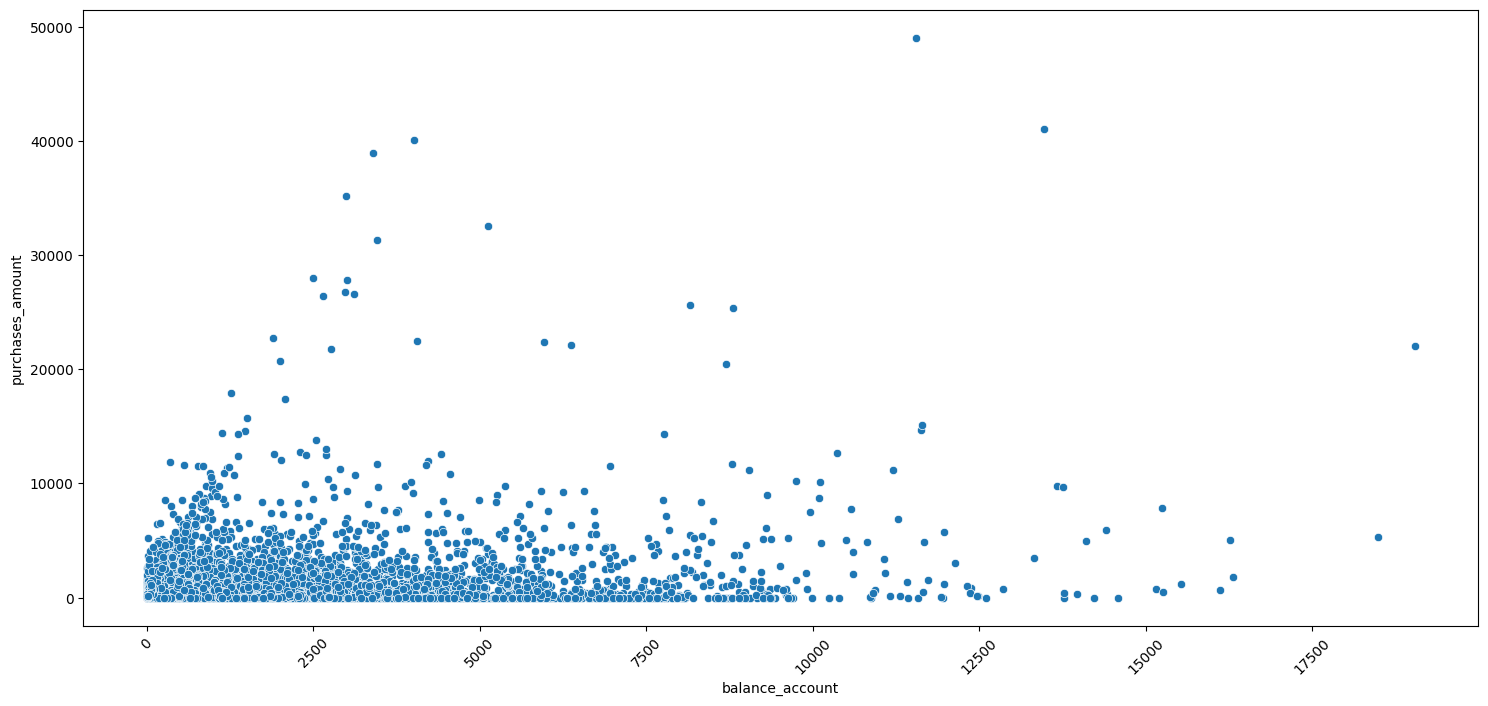

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.scatterplot( ax=ax, y='purchases_amount', x= 'balance_account', data=data)
plt.xticks(rotation=45);

In [ ]:
data = data.drop('customer_id', axis=1)
data.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

In [ ]:
## feature engeneering

def transform_features(df):
    # Derived features
    df['purchase_to_limit_ratio'] = df['purchases_amount'] / df['credit_limit'] # amount of purchases / credit limit
    df['payment_to_limit_ratio'] = df['payments'] / df['credit_limit'] # amount of payment to credit card / credit limit
    df['installment_to_purchase_ratio'] = df['installments'] / df['purchases_amount'] # amount of purchases done in installments /  amount of purchases made from account
    df['balance_utilization'] = df['balance_account'] / df['credit_limit'] #  balance amount left in the account to make purchases at the end of the 6-month period / credit limit
    df['payment_to_purchase_ratio'] = df['payments'] / df['purchases_amount'] # amount of payment to credit card / amount of purchases made from account
    df['average_purchase_size'] = df['purchases_amount'] / df['nr_purchases'] # # amount of purchases / number of purchase transactions mad
    df['cash_advance_to_limit_ratio'] = df['nr_cash_advances'] / df['credit_limit'] #cash advances / credit limit

    # Handle potential division by zero
    df.replace([float('inf'), -float('inf')], 0, inplace=True)
    df.fillna(0, inplace=True)

    # Scaling
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

df = data.copy() #make copy so data is not changed.

df_transformed = transform_features(df.copy())

# Add the new features to the original 'data' DataFrame
for col in df_transformed.columns:
    if col not in data.columns:  # Avoid overwriting existing columns
        data[col] = df_transformed[col]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8201 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8201 non-null   float64
 1   purchases_amount                  8201 non-null   float64
 2   paid_advance                      8201 non-null   float64
 3   full_purchases                    8201 non-null   float64
 4   balance_frequency_update          8201 non-null   float64
 5   installments                      8201 non-null   float64
 6   purchases_frequency               8201 non-null   float64
 7   full_purchases_frequency          8201 non-null   float64
 8   purchases_installments_frequency  8201 non-null   float64
 9   cash_advance_frequency            8201 non-null   float64
 10  nr_cash_advances                  8201 non-null   int64  
 11  nr_purchases                      8201 non-null   int64  
 12  credit_limi

In [ ]:
credit_limit_stats = df['credit_limit'].describe()
print(credit_limit_stats)

count     8201.000000
mean      4513.056716
std       3653.019602
min         50.000000
25%       1500.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: credit_limit, dtype: float64


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'balance_account'),
  Text(0, 1.5, 'purchases_amount'),
  Text(0, 2.5, 'paid_advance'),
  Text(0, 3.5, 'full_purchases'),
  Text(0, 4.5, 'balance_frequency_update'),
  Text(0, 5.5, 'installments'),
  Text(0, 6.5, 'purchases_frequency'),
  Text(0, 7.5, 'full_purchases_frequency'),
  Text(0, 8.5, 'purchases_installments_frequency'),
  Text(0, 9.5, 'cash_advance_frequency'),
  Text(0, 10.5, 'nr_cash_advances'),
  Text(0, 11.5, 'nr_purchases'),
  Text(0, 12.5, 'credit_limit'),
  Text(0, 13.5, 'fixed_rate_period'),
  Text(0, 14.5, 'payments'),
  Text(0, 15.5, 'min_payments'),
  Text(0, 16.5, 'full_payment_prc')])

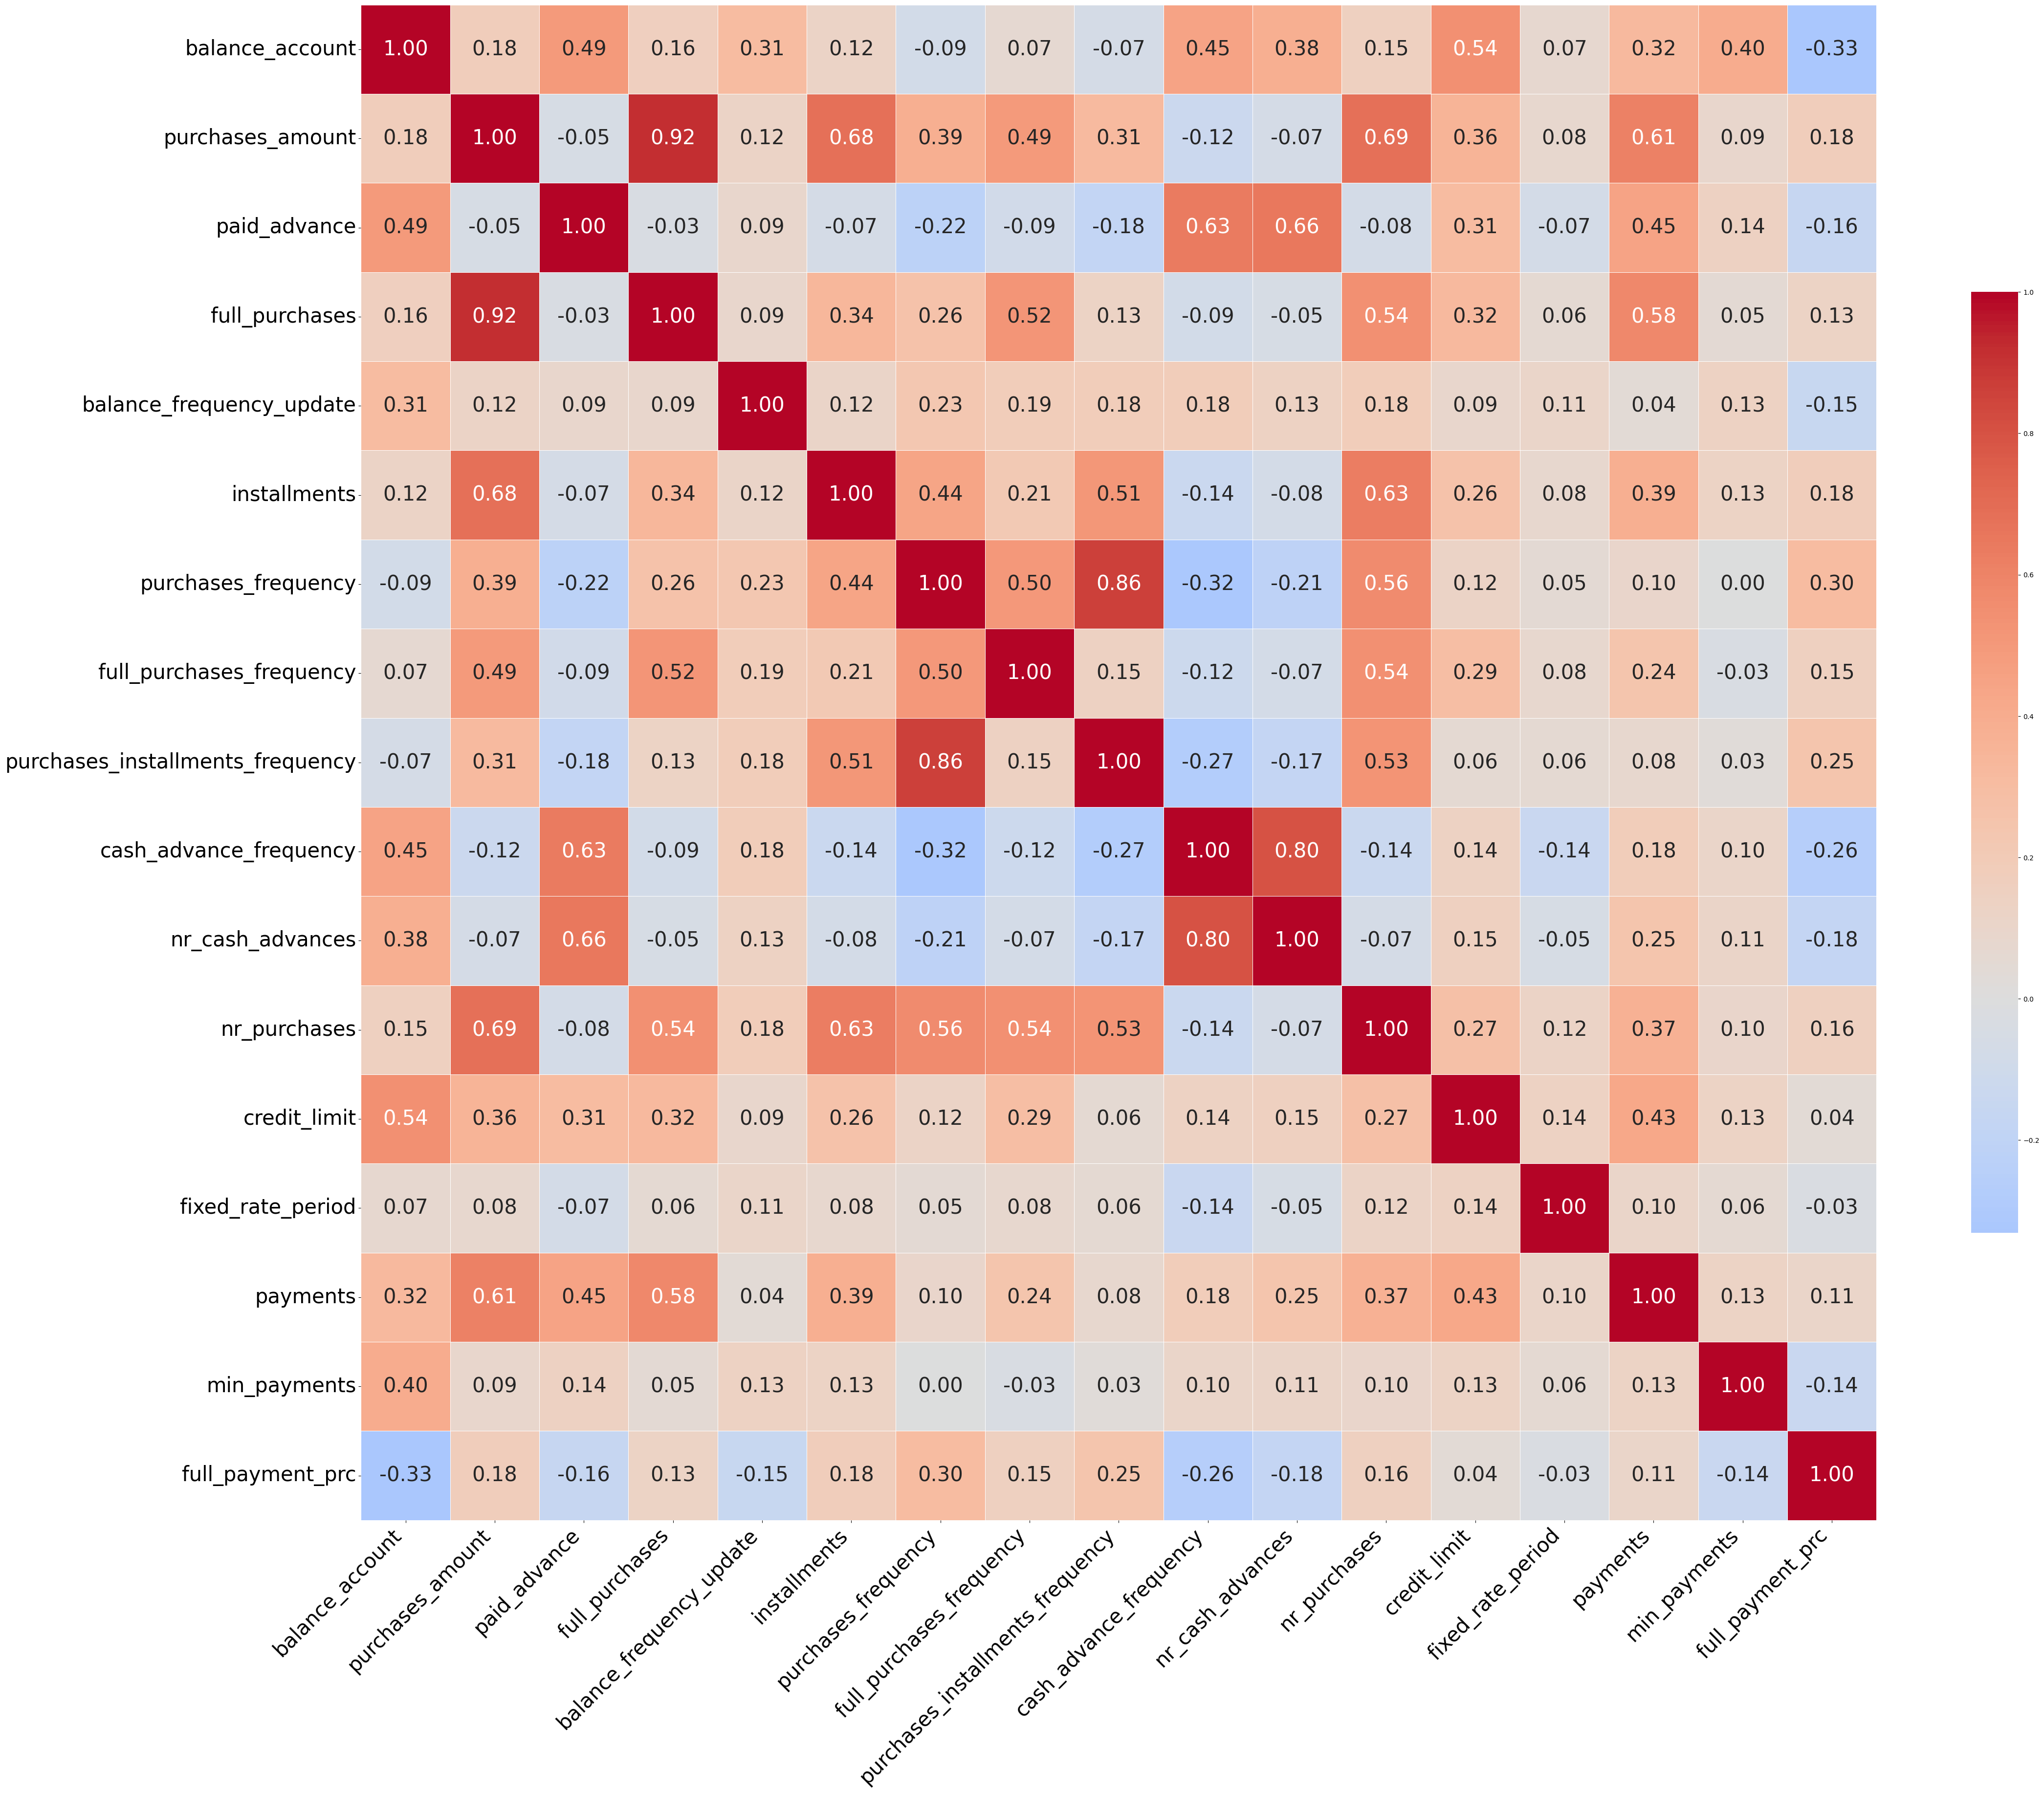

In [ ]:
corr = df.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(50, 50)) # setting up the empty plot to use next


# Assembly of the heatmap:
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    annot_kws={"size": 30},  # Increase the size of the correlation numbers
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
)

# Increase the size of the feature labels (x and y ticks)
ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
plt.xticks(rotation=45, ha='right', fontsize=30) # Increase x tick font size and rotate
plt.yticks(fontsize=30) #Increase y tick font size

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'balance_account'),
  Text(0, 1.5, 'purchases_amount'),
  Text(0, 2.5, 'paid_advance'),
  Text(0, 3.5, 'full_purchases'),
  Text(0, 4.5, 'balance_frequency_update'),
  Text(0, 5.5, 'installments'),
  Text(0, 6.5, 'purchases_frequency'),
  Text(0, 7.5, 'full_purchases_frequency'),
  Text(0, 8.5, 'purchases_installments_frequency'),
  Text(0, 9.5, 'cash_advance_frequency'),
  Text(0, 10.5, 'nr_cash_advances'),
  Text(0, 11.5, 'nr_purchases'),
  Text(0, 12.5, 'credit_limit'),
  Text(0, 13.5, 'fixed_rate_period'),
  Text(0, 14.5, 'payments'),
  Text(0, 15.5, 'min_payments'),
  Text(0, 16.5, 'full_payment_prc'),
  Text(0, 17.5, 'purchase_to_limit_ratio'),
  Text(0, 18.5, 'payment_to_limit_ratio'),
  Text(0, 19.5, 'installment_to_purchase_ratio'),
  Text(0, 20.5, 'balance_utilization'),
  Text(0, 21.5, 'paymen

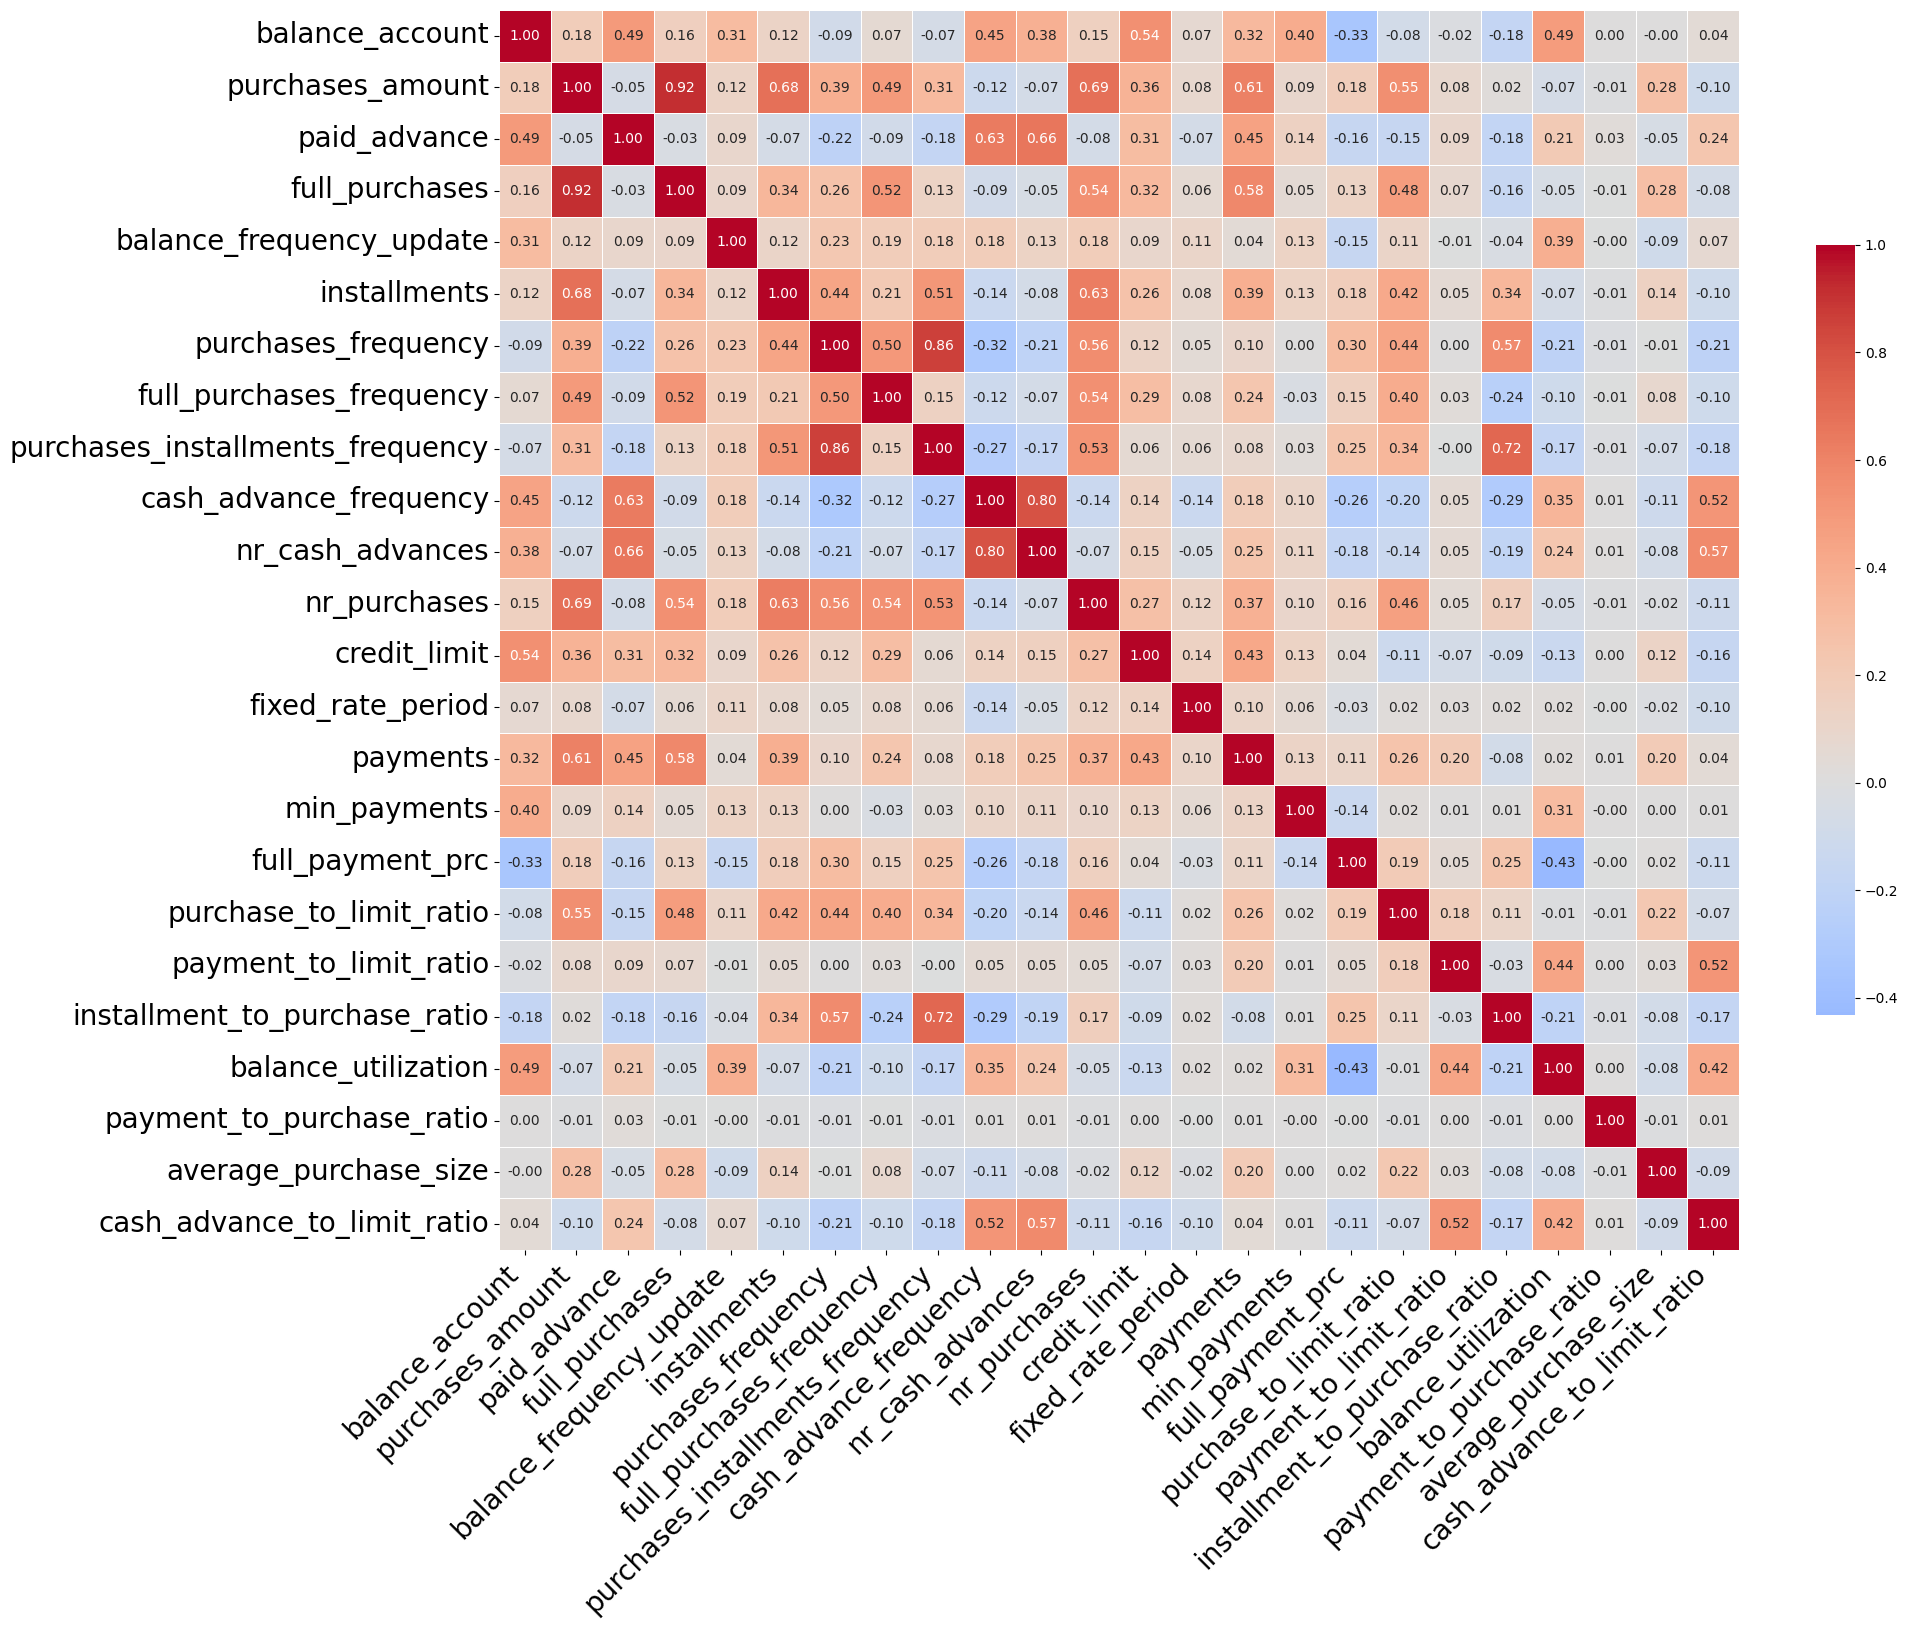

In [ ]:
corr = data.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(20, 20)) # setting up the empty plot to use next


# Assembly of the heatmap:
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    annot_kws={"size": 10},  # Increase the size of the correlation numbers
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
)

# Increase the size of the feature labels (x and y ticks)
ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
plt.xticks(rotation=45, ha='right', fontsize=20) # Increase x tick font size and rotate
plt.yticks(fontsize=20) #Increase y tick font size

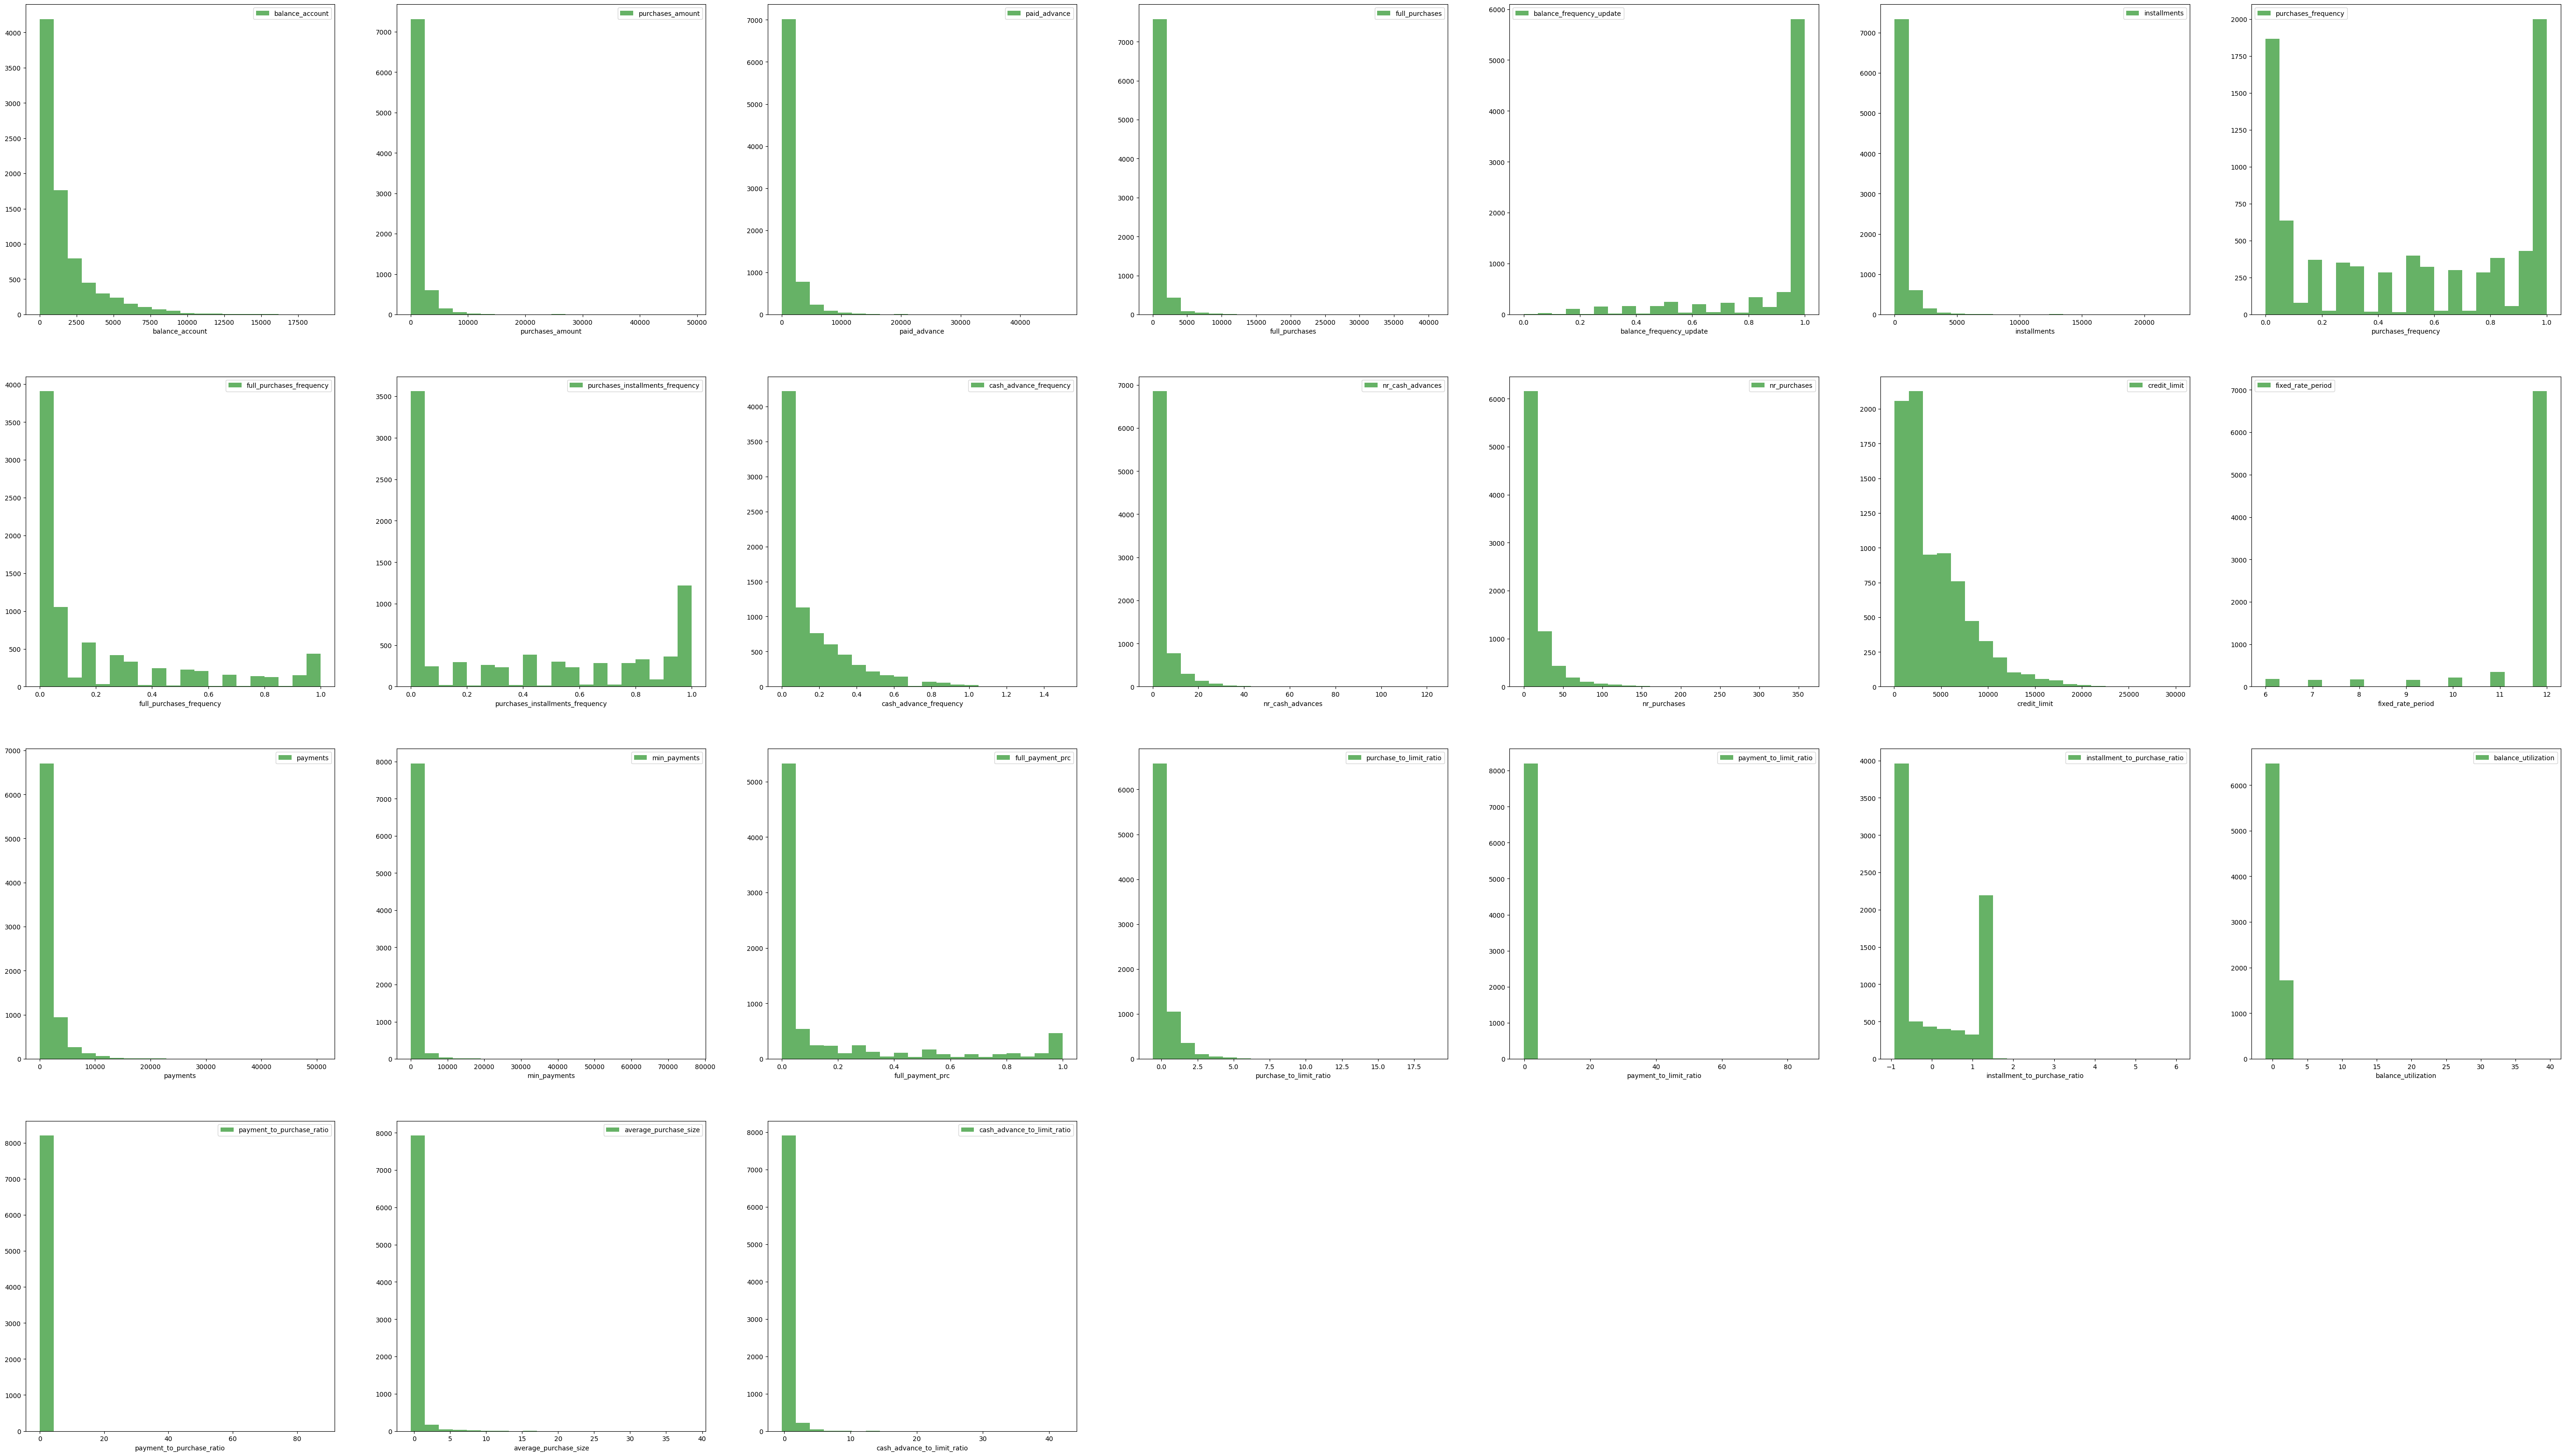

In [ ]:
# DESCRIPTION --> # it plots the distributions of your data
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()


plot_distrib(data, ncols=7, nrows=5, figsize=(70, 50)) # calling the function we defined at the beginning of this notebook

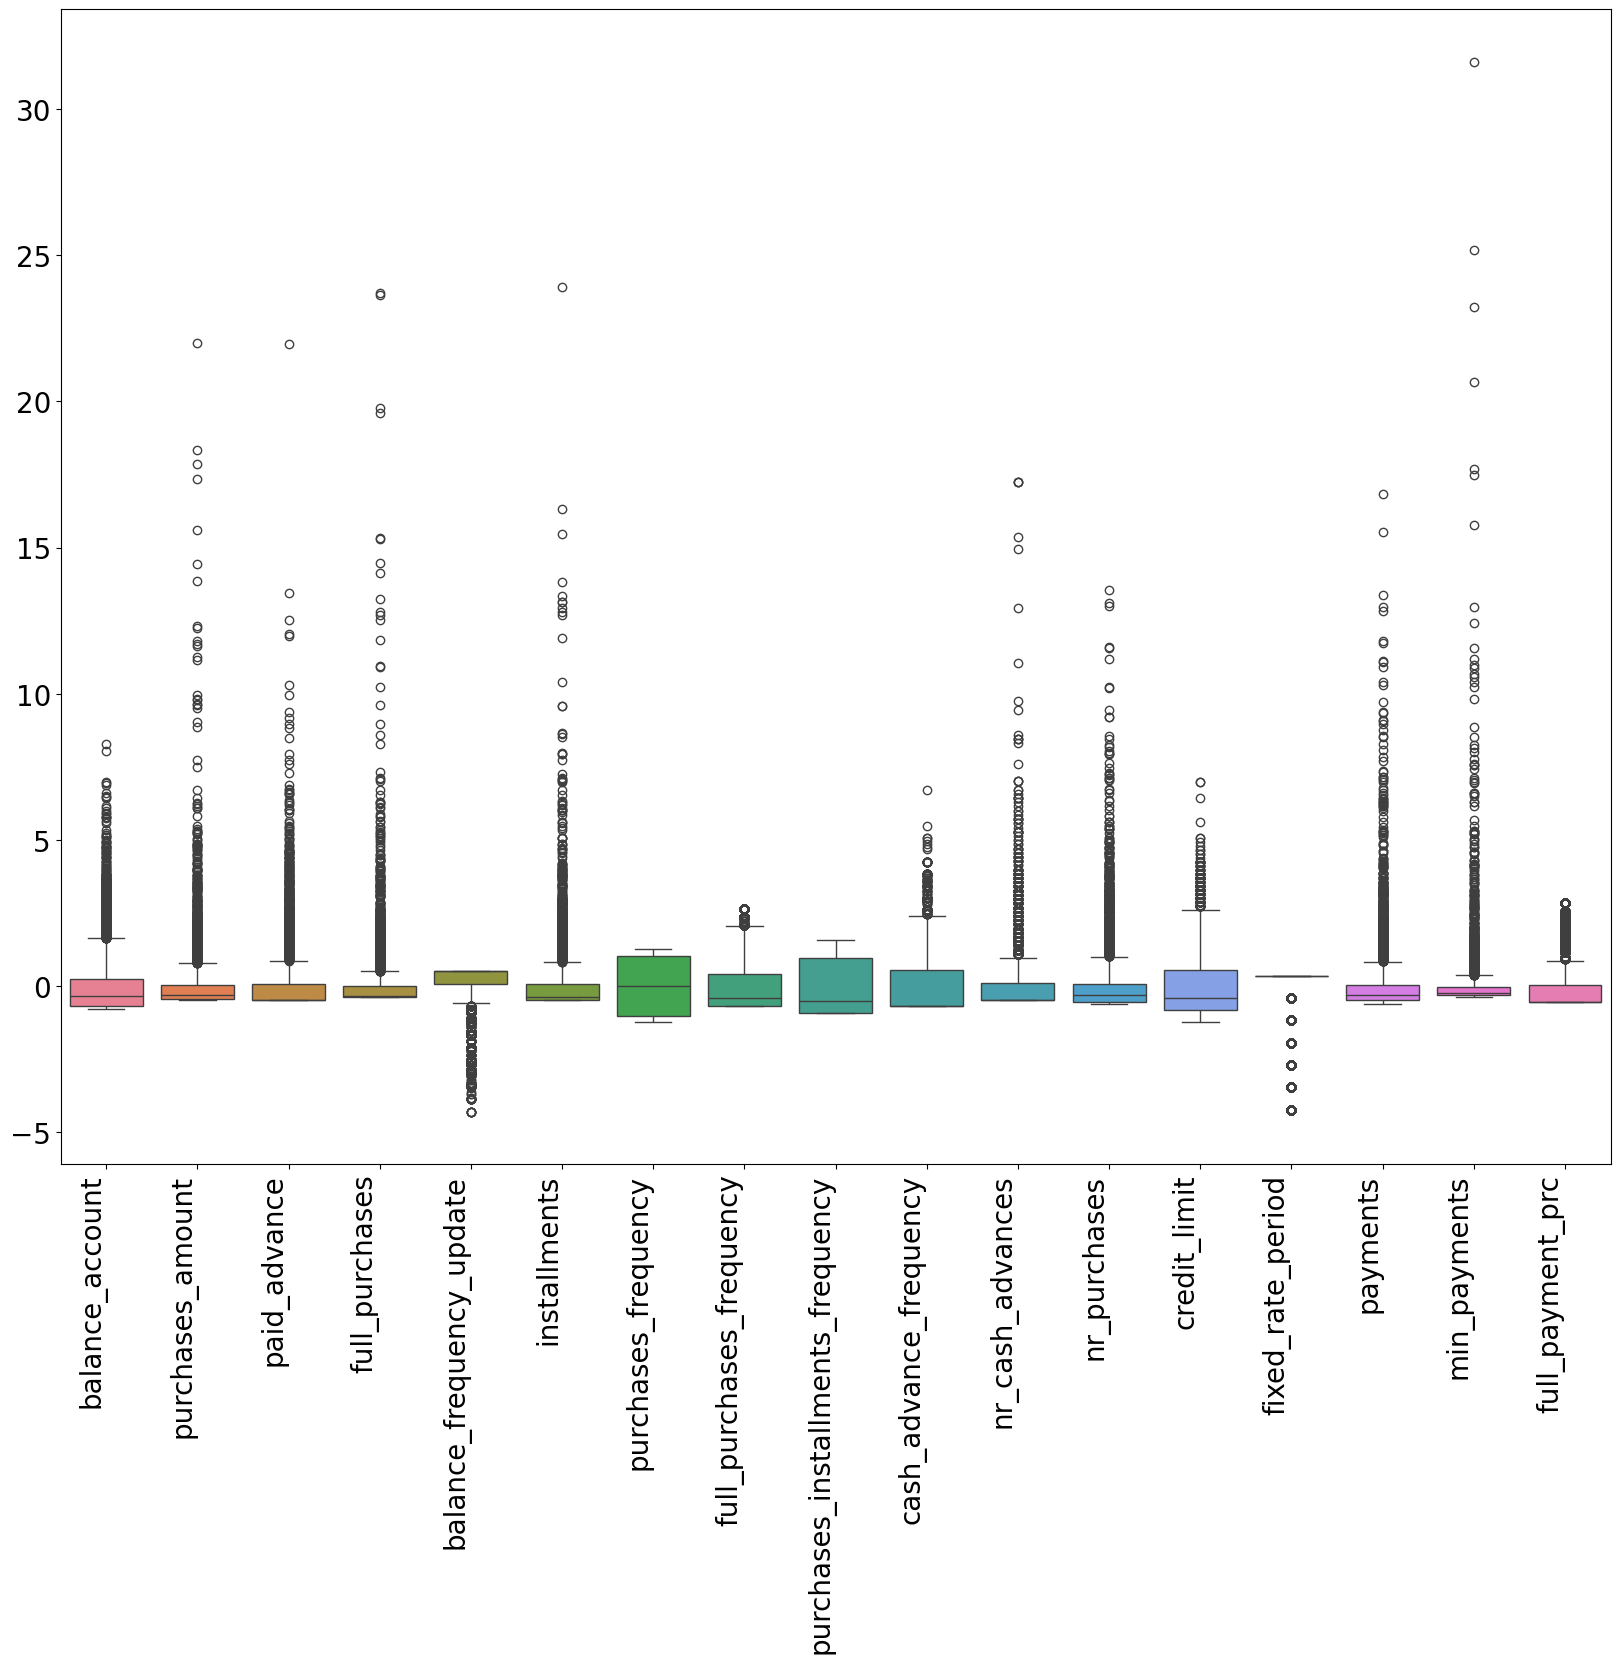

In [ ]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plt.figure(figsize=(20, 15))  # Adjust the figure size here (width, height)
plt.xticks(rotation=45, ha='right', fontsize=20) # Increase x tick font size and rotate
plt.yticks(fontsize=20) #Increase y tick font size
ax = sns.boxplot(data=df_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [119]:
## Application of Clustering Techniques


## Clustering: K-Means
r_seed = 42  # random seed to use during modeling for reproducability purposes


cluster_errors = []
for i in range(1, 15):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0,
                       # n_jobs=1
                      ),
            ),
        ]
    )
    kmeans_pipeline.fit(df)
    kmeans_pipeline.predict(df)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)


100%|██████████| 9/9 [05:12<00:00, 34.77s/it]


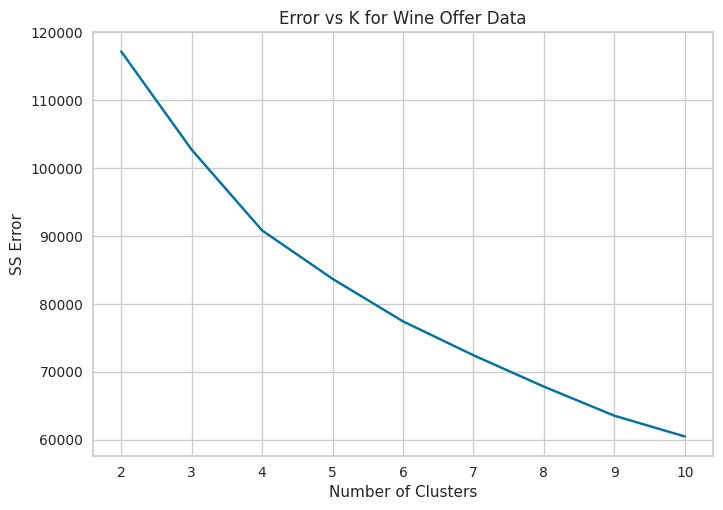

In [120]:
## let's try different values of K in K-means clustering and plot K vs the error.
from sklearn.cluster import KMeans
from tqdm import tqdm  # Import tqdm for progress bar

ss = []
cluster_ranges = range(2, 11)

for K in tqdm(cluster_ranges):

    # fit a k-means model
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
    kmeans.fit_predict(X)
    # stores the ss errors.
    ss.append(kmeans.inertia_)

ax = sns.lineplot(x=cluster_ranges, y=ss)
ax.set_title("Error vs K for Wine Offer Data")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SS Error');



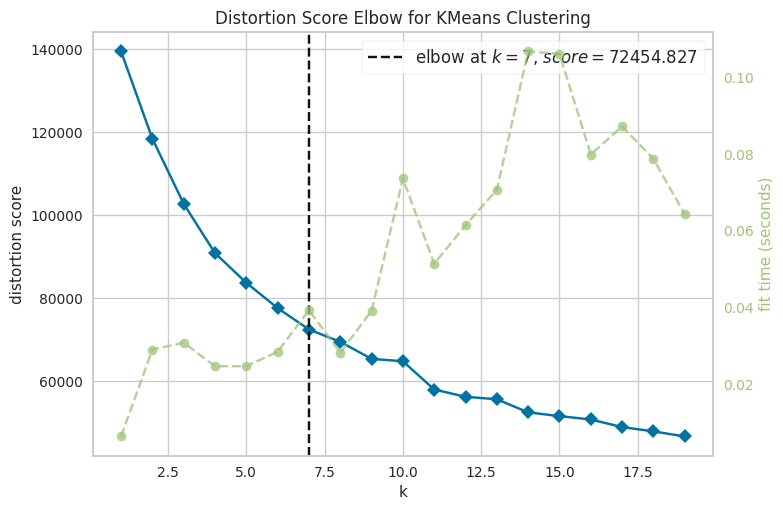

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
##Finding the optimal number of clusters: Elbow Method

# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# List with Features:
features = list(df.columns)

# Setting up the content of variable 'X':
X = df.loc[:,features].values

numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)

# Clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data




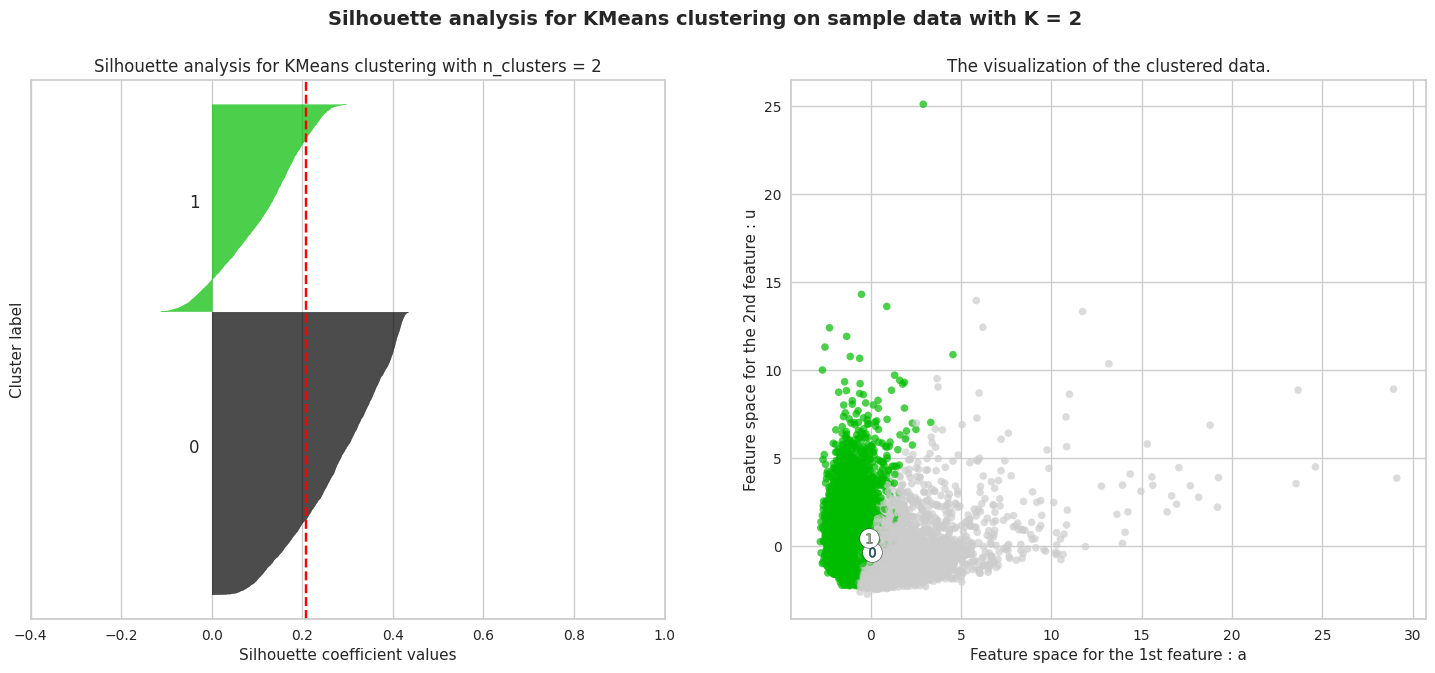

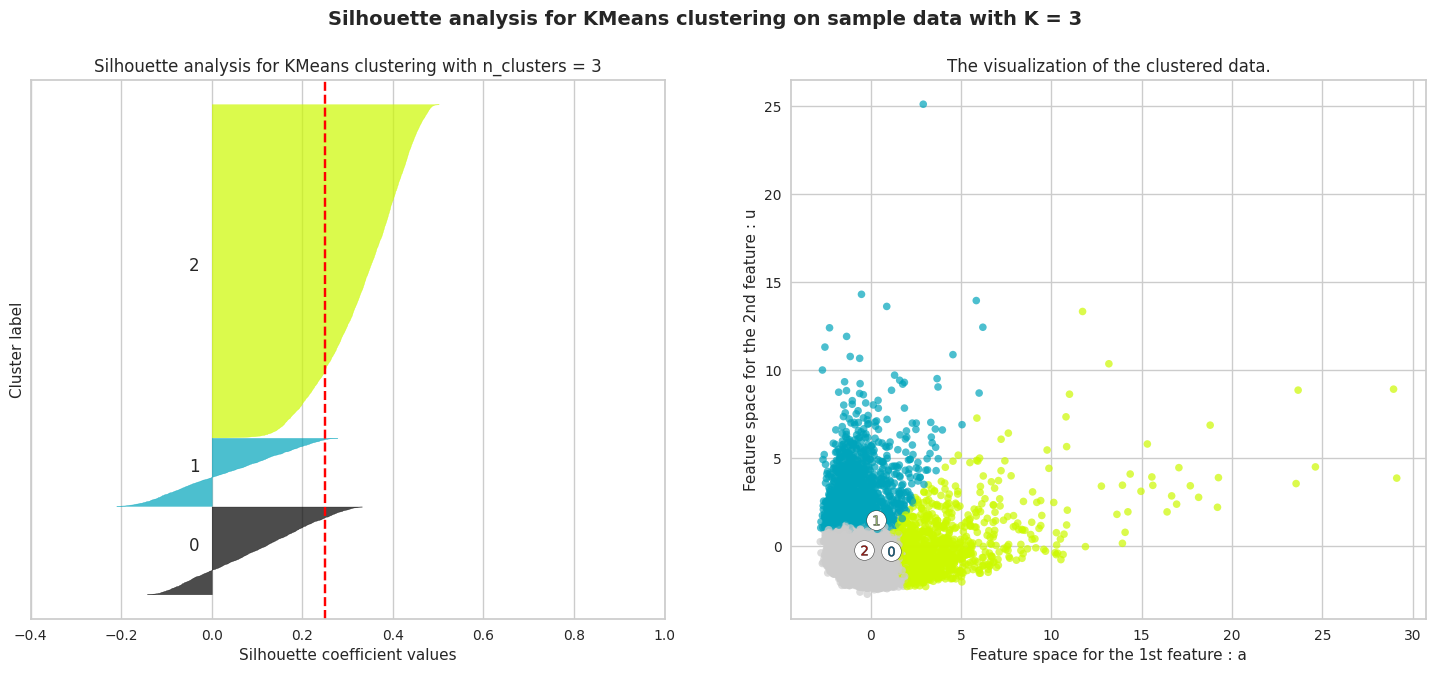

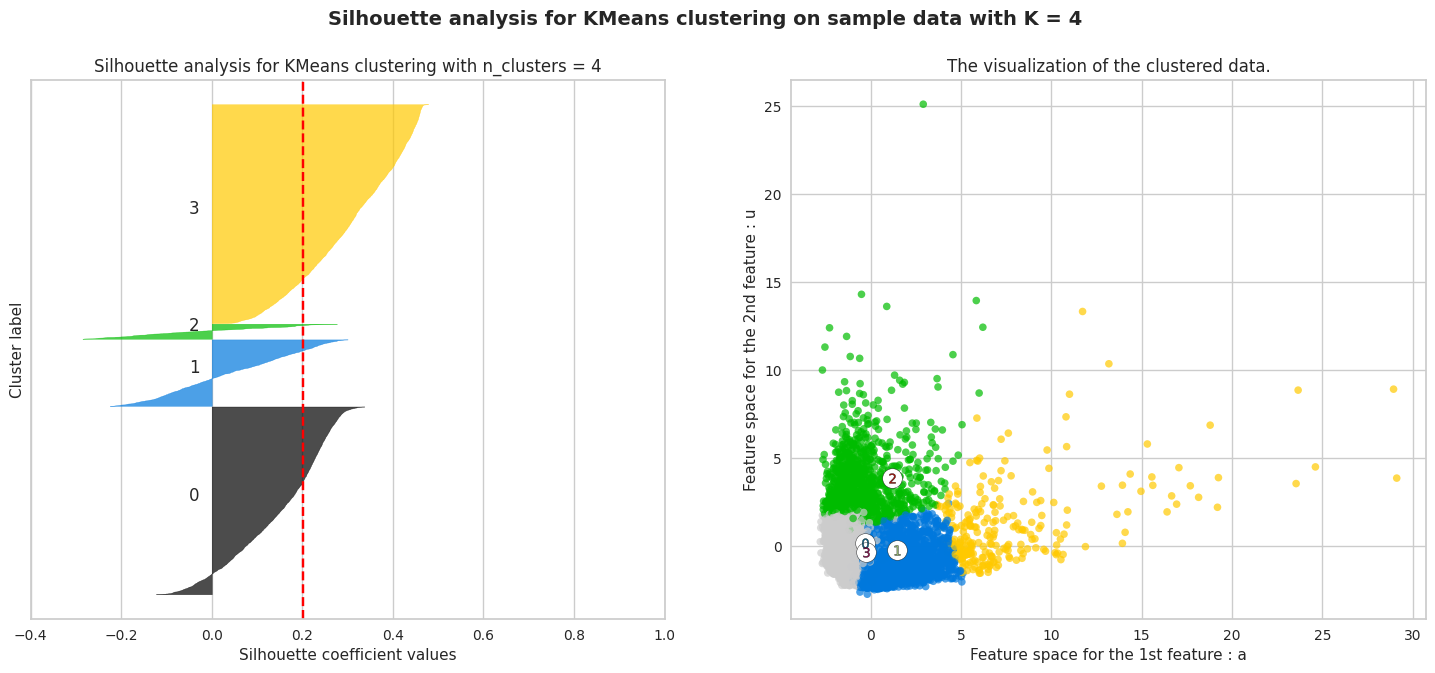

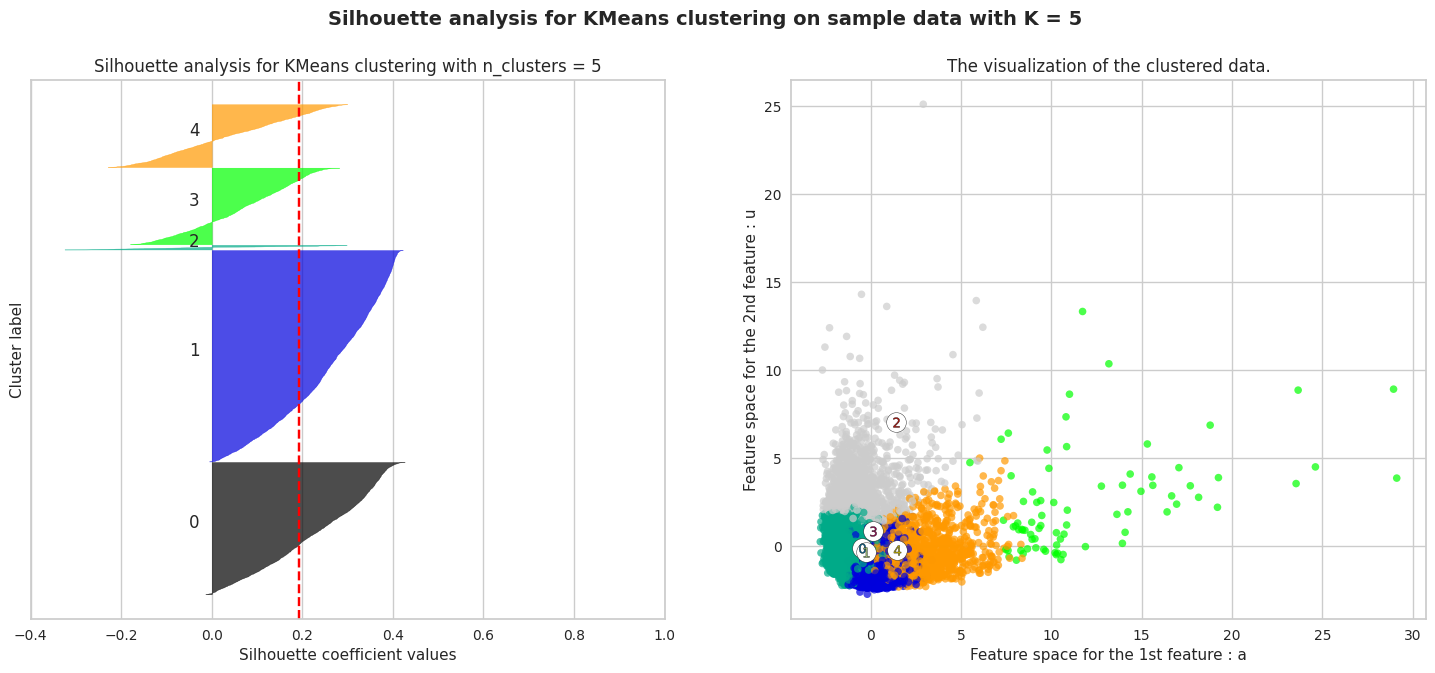

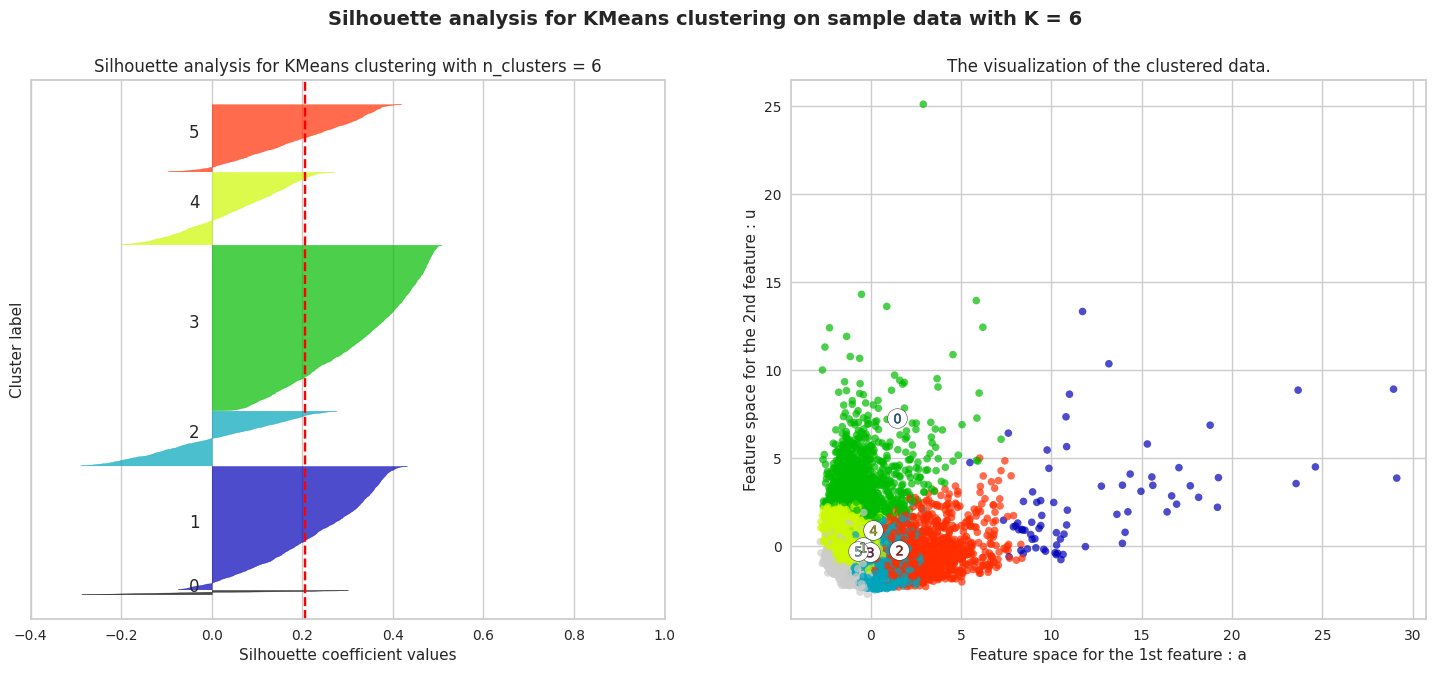

In [123]:
# Code adapted from scikit-learn documentation example.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import numpy as np

avg_silhouette_scores = []
cluster_ranges = range(2, 7)

# Get rid of warning of too many plots open
plt.rcParams.update({'figure.max_open_warning': 0})

for K in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax.set_xlim([-.4, 1])
    # The (K+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    kmeans_model = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
    cluster_labels = kmeans_model.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = (silhouette_score(X, cluster_labels))
    avg_silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette analysis for KMeans clustering with n_clusters = {K}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / K)
    # to visualize the actual data in a continuous space we use PCA
    pca = PCA(n_components=2).fit(X)
    data2D = pca.transform(X)
    ax2.scatter(data2D[:, 0], data2D[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans_model.cluster_centers_
    # Draw white circles at cluster centers


    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for the 1st feature : {df.columns[0][1]}")
    ax2.set_ylabel(f"Feature space for the 2nd feature : {df.columns[1][1]}")

    plt.suptitle(
        (
            f"Silhouette analysis for KMeans clustering on sample data with K = {K}"
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")

plt.show()

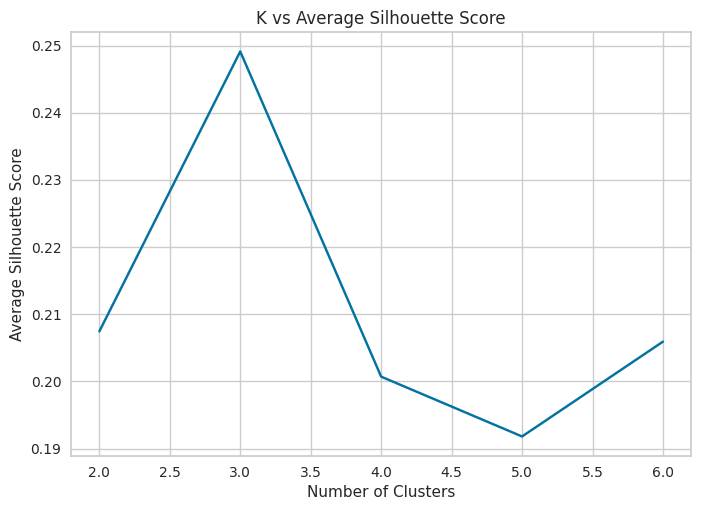

In [124]:
## Now plot average Silhouette Score for each value of K.





ax = sns.lineplot(x=cluster_ranges, y=avg_silhouette_scores)
ax.set_title('K vs Average Silhouette Score')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Average Silhouette Score');



| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |


In [125]:
avg_silhouette_scores

[0.20744183362665122,
 0.24911427183328796,
 0.20070423431374365,
 0.1917988227085984,
 0.20591715745162084]

In [126]:
# Visualizing Clusters using PCA
from sklearn.decomposition import PCA

# First calculate top two PCA features.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
x = pca_features[:,0]
y = pca_features[:,1]

K=3

kmeans = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
cl_labels = kmeans.fit_predict(X)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels,
                                'pc_1':x,
                                'pc_2':y})
df_pca_features





cluster_id      pc_1      pc_2
0              2 -0.295004 -2.032430
1              2 -0.682695 -1.717645
2              2 -2.008301  0.477861
3              2  0.464027 -0.858512
4              2 -1.686313 -0.093575
...          ...       ...       ...
8196           2  1.407624 -0.295006
8197           2 -1.395882  0.175565
8198           2 -0.153365 -1.808670
8199           2  0.490934 -0.157712
8200           2  1.418875 -0.984006

[8201 rows x 3 columns]

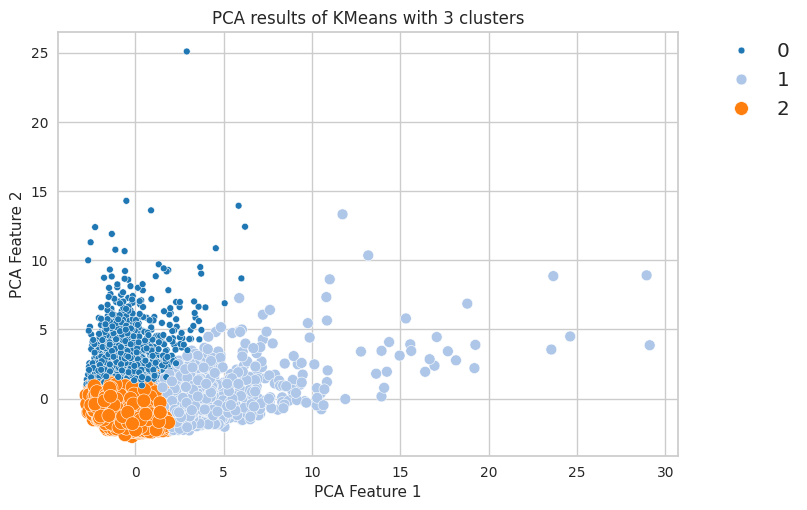

In [127]:
ax = sns.scatterplot(x='pc_1', y='pc_2',
                hue='cluster_id',
                size='cluster_id',
                data=df_pca_features,
                palette='tab20',
                legend='full')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(K) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

In [128]:
## Data Story & Insights
#Data Merging

#Merging clusters with original customer and offer data

cl_labels

df_with_index = df.reset_index() #creates a new dataframe with a new index column.



In [129]:
customer_segments = pd.DataFrame({
    'row_number': df_with_index.index.tolist(), #or pivot_with_index['index'].tolist() if index name is not default.
    'cluster': cl_labels
})


customer_segments.head(10)

row_number  cluster
0           0        2
1           1        2
2           2        2
3           3        2
4           4        2
5           5        0
6           6        2
7           7        2
8           8        2
9           9        2

In [130]:
customer_segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8201 entries, 0 to 8200
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   row_number  8201 non-null   int64
 1   cluster     8201 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 96.2 KB


In [131]:
df_merged_with_index = df_with_index.reset_index()

df_cluster_merged = df_merged_with_index.merge(customer_segments, left_index=True, right_on='row_number') #or on='row_number' if index column is named 'row_number'
df_cluster_merged.head(10)


level_0  index  balance_account  purchases_amount  paid_advance  \
0        0      0         9.298409            107.60      0.000000   
1        1      1        52.666422            150.30      0.000000   
2        2      2      1360.795674              0.00    462.861443   
3        3      3      2021.641161            363.18      0.000000   
4        4      4        22.322374             95.00   1162.045833   
5        5      5      9266.080540            100.00   4383.296268   
6        6      6        97.389327             60.00      0.000000   
7        7      7      4788.283283              0.00    437.808586   
8        8      8       319.037744           1262.28      0.000000   
9        9      9      1641.251218              0.00   2990.165538   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   
5            0.00                  1.000000         100.0   
6           60.00                  1.000000           0.0   
7            0.00                  1.000000           0.0   
8         1262.28                  0.818182           0.0   
9            0.00                  0.727273           0.0   

   purchases_frequency  full_purchases_frequency  ...  cash_advance_frequency  \
0             0.909091                  0.000000  ...                0.000000   
1             1.000000                  0.000000  ...                0.000000   
2             0.000000                  0.000000  ...                0.272727   
3             1.000000                  1.000000  ...                0.000000   
4             0.083333                  0.083333  ...                0.166667   
5             0.333333                  0.000000  ...                0.166667   
6             0.083333                  0.083333  ...                0.000000   
7             0.000000                  0.000000  ...                0.166667   
8             0.250000                  0.250000  ...                0.000000   
9             0.000000                  0.000000  ...                0.166667   

   nr_cash_advances  nr_purchases  credit_limit  fixed_rate_period  \
0                 0            10        1000.0                 11   
1                 0             6        1000.0                  6   
2                 6             0        1500.0                 11   
3                 0            13        2000.0                 12   
4                 3             1        2500.0                 12   
5                 3             4       17500.0                 12   
6                 0             1       12500.0                 12   
7                 2             0        5000.0                 12   
8                 0             6       10500.0                 12   
9                 4             0        3000.0                 12   

      payments  min_payments  full_payment_prc  row_number  cluster  
0    89.868853     89.711672          0.428571           0        2  
1    54.722514     82.955180          0.000000           1        2  
2   303.031979    443.781316          0.000000           2        2  
3   704.240770    795.859808          0.000000           3        2  
4  4094.261427     40.142262          0.000000           4        2  
5  2444.123547   2603.406476          0.000000           5        0  
6   453.421982    204.880010          0.000000           6        2  
7   823.840717   1934.821741          0.000000           7        2  
8  1350.541585    218.810614          0.125000           8        2  
9  4399.723425    500.276155          0.142857           9        2  

[10 rows x 21 columns]

In [ ]:
res = pd.crosstab(df_cluster_merged.cluster, df_cluster_merged.average_purchase_size)
res

AttributeError: 'DataFrame' object has no attribute 'average_purchase_size'

In [132]:

# select best columns
best_cols = ["cluster","balance_account", "purchases_amount", "purchases_frequency", "installments", "credit_limit", "paid_advance"]

# dataframe with best columns
df_final = pd.DataFrame(df_cluster_merged[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(df_final.shape))



New dataframe with best columns has just been created. Data shape: (8201, 7)


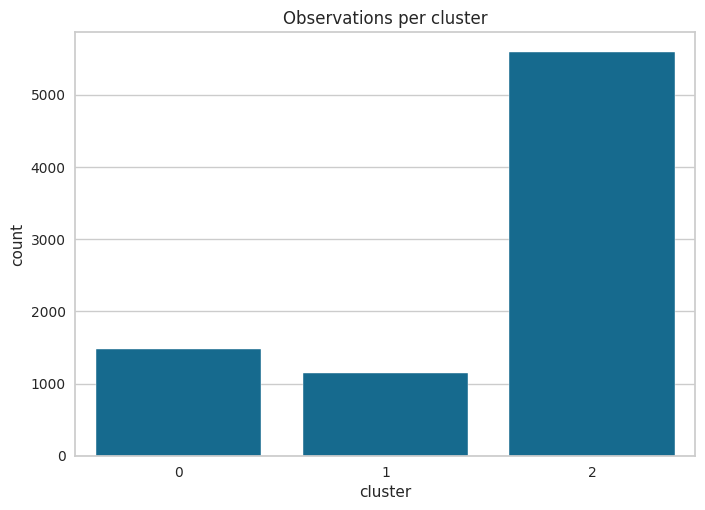

In [133]:
#COUNT OB BY CLUSTER for a more visual display:
sns.countplot(x='cluster', data=df_final)
plt.title("Observations per cluster")
plt.show()

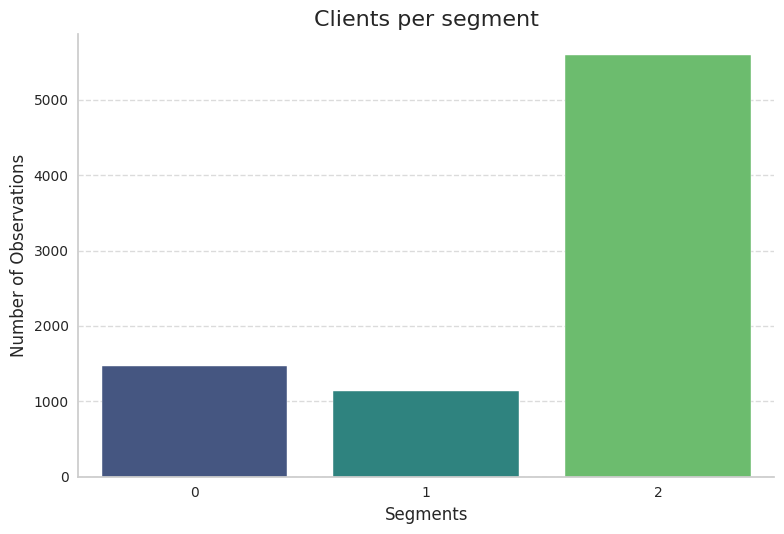

In [134]:

import seaborn as sns
# Define a nice color palette
palette = sns.color_palette("viridis", n_colors=df_final['cluster'].nunique())

# Create the countplot with the specified palette
sns.countplot(x='cluster', data=df_final, palette=palette)

# Customize the plot
plt.title("Clients per segment", fontsize=16)
plt.xlabel("Segments", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set a nice background style
sns.set_style("whitegrid")  # Or "darkgrid", "white", "ticks"

# Remove top and right spines
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()



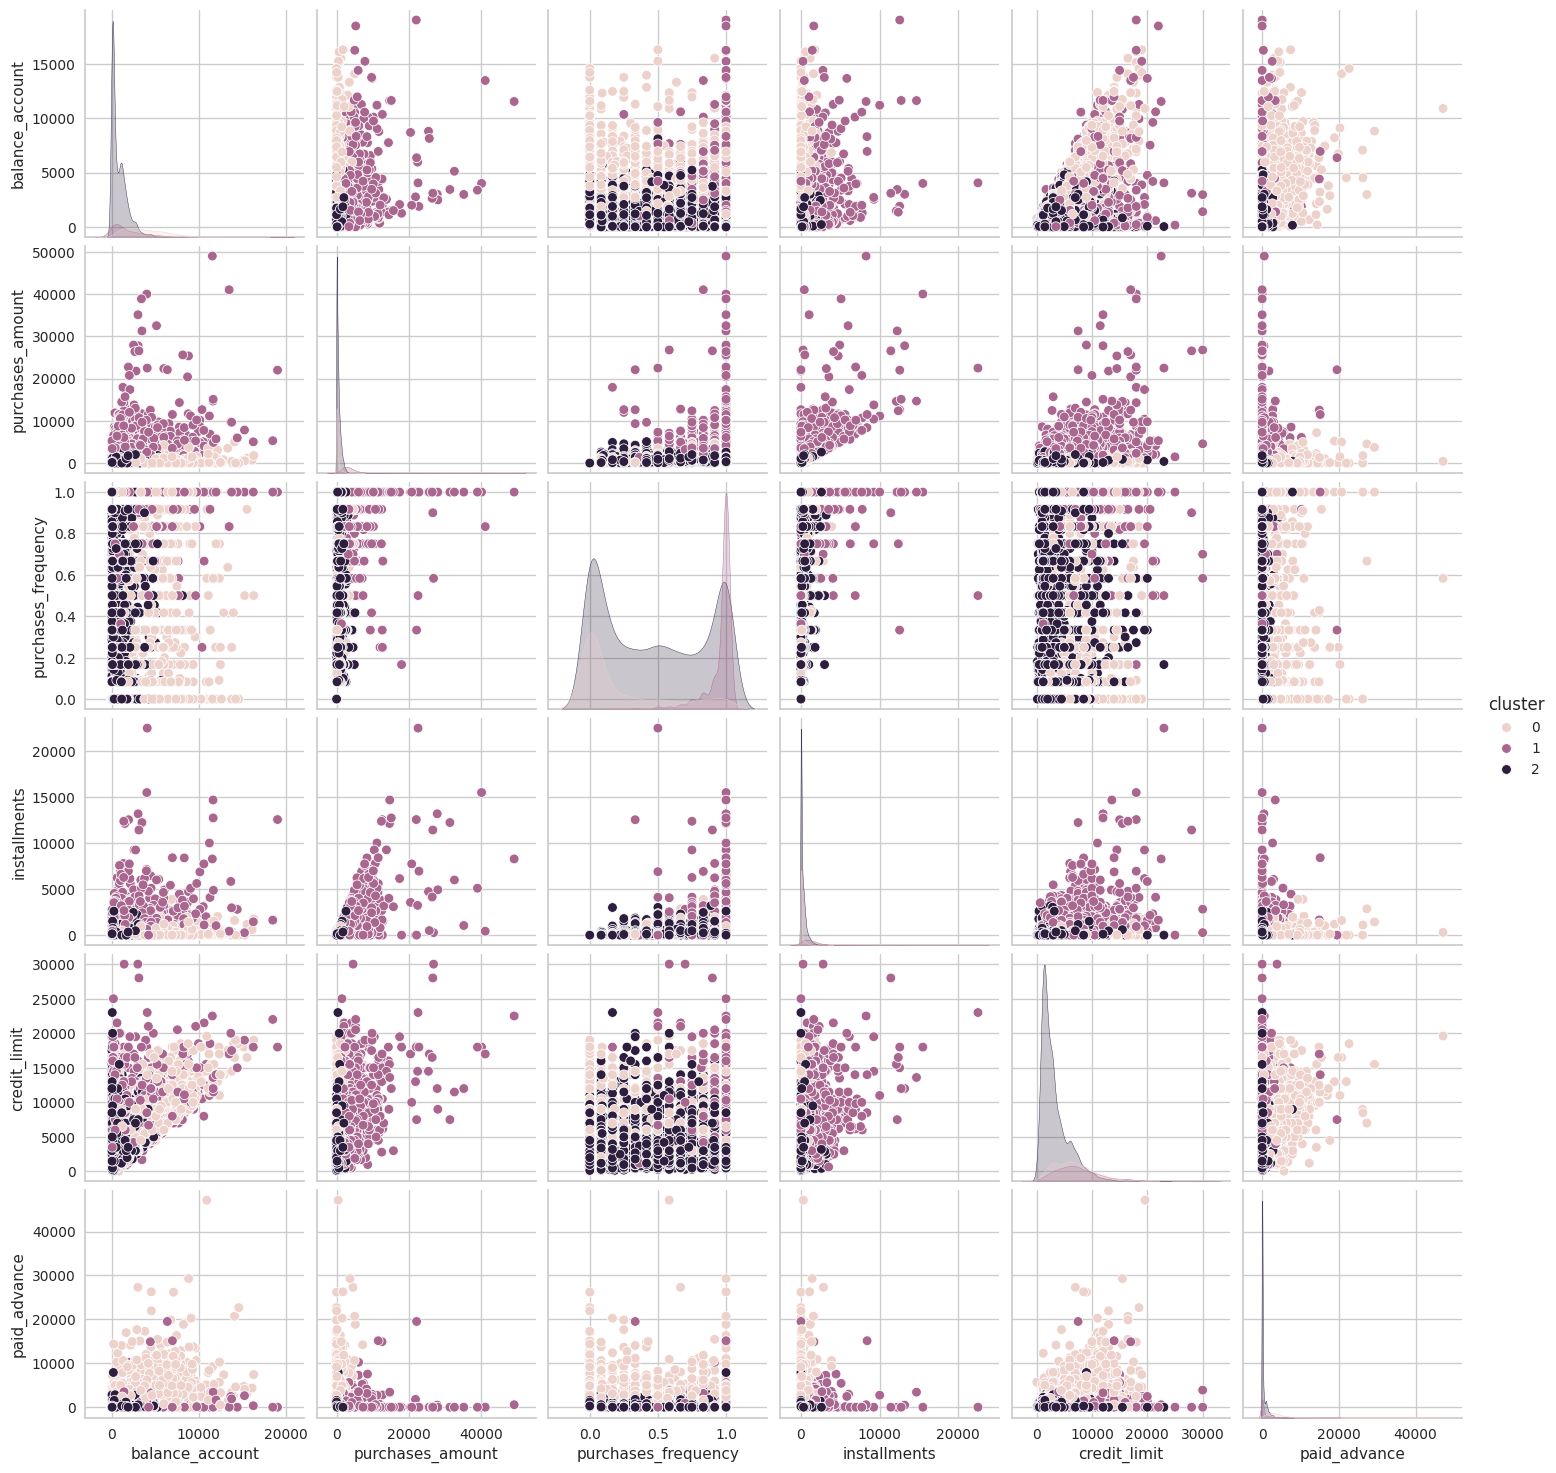

In [135]:
# apply KMeans clustering
alg = KMeans(n_clusters = 4)
label = alg.fit_predict(df_final)

# create a 'cluster' column and ensure it's a 1D array
#df_final['cluster'] = label.flatten()  # Flatten the label array
#best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(df_final[best_cols], hue='cluster')

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['balance_account', 'purchases_amount', 'purchases_frequency',"installments", "credit_limit", "paid_advance"],
            y_vars=['cluster'],
            height=5, aspect=1)


In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['paid_advance'], y_vars=['credit_limit'],
            height=5, aspect=1)



In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['balance_account'], y_vars=['credit_limit'],
            height=5, aspect=1)


In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['purchases_frequency'], y_vars=['credit_limit'],
            height=5, aspect=1)


In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['purchases_amount'], y_vars=['credit_limit'],
            height=5, aspect=1)

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['installments'], y_vars=['credit_limit'],
            height=5, aspect=1)

In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['balance_account', "purchases_amount"],
            y_vars=['cluster'],
            height=5, aspect=1)


In [ ]:
sns.pairplot(df_final[best_cols], hue='cluster', x_vars=['balance_account', "credit_limit"],
            y_vars=['cluster'],
            height=5, aspect=1)

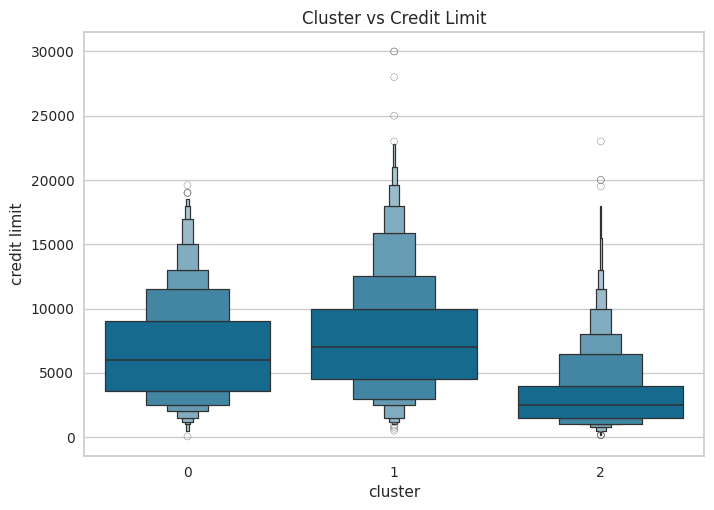

In [136]:
#Plotting the number of deals purchased


plt.figure()
pl=sns.boxenplot(y=df_final["credit_limit"],x=df_final["cluster"])
pl.set_title("Cluster vs Credit Limit")
pl.set_xlabel("cluster")
pl.set_ylabel("credit limit")
plt.show()

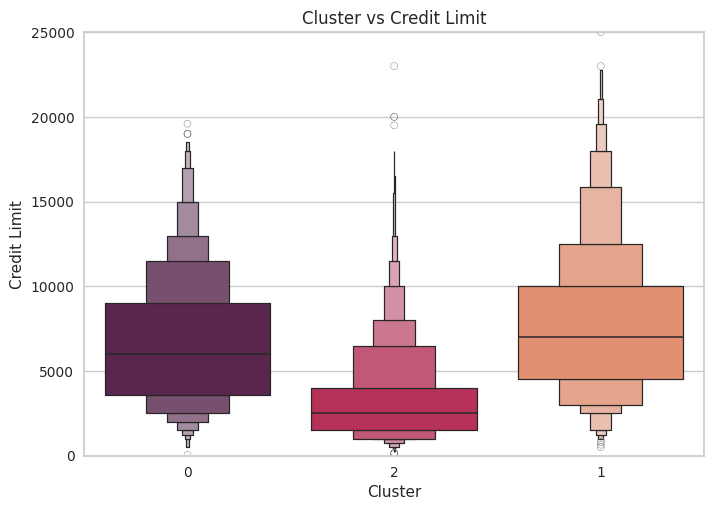

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # For generating example data



# Sort clusters based on their median credit limit.
sorted_clusters = cluster_medians.sort_values().index

# Create a colormap for the heatmap-style gradient.
cmap = sns.color_palette("rocket", n_colors=len(sorted_clusters))

plt.figure()
pl = sns.boxenplot(y=df_final["credit_limit"], x=df_final["cluster"], order=sorted_clusters, palette=cmap)
pl.set_title("Cluster vs Credit Limit")
pl.set_xlabel("Cluster")
pl.set_ylabel("Credit Limit")

# Set the y-axis limit
plt.ylim(0, 25000)

plt.show()

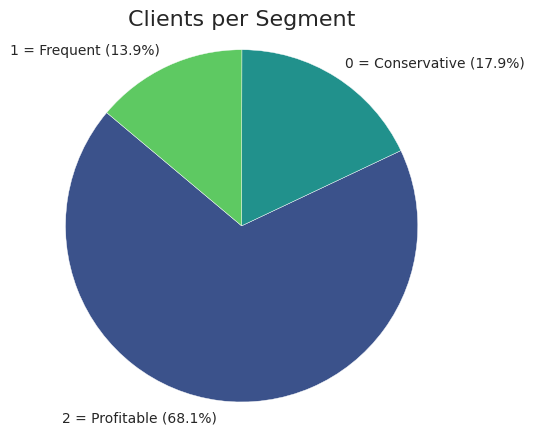

In [138]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_final is your DataFrame and 'cluster' is the column with cluster labels

# Define labels for the clusters
cluster_labels = {0: '0 = Conservative', 1: '1 = Frequent', 2: '2 = Profitable'}

# Get the count of each cluster
cluster_counts = df_final['cluster'].value_counts()

# Calculate percentages
percentages = (cluster_counts / cluster_counts.sum()) * 100

# Map cluster values to labels
labels = [cluster_labels[cluster] for cluster in cluster_counts.index]

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=[f'{label} ({percentage:.1f}%)' for label, percentage in zip(labels, percentages)], autopct='', startangle=140, colors=sns.color_palette("viridis", n_colors=len(cluster_counts)))

plt.title("Clients per Segment", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()